In this section, we will briefly introduce some interesting characteristics of the adjacency matrix. 

In [39]:

import networkx as nx
import matplotlib.pyplot as plt
import torch
import pandas as pd

Let's first create a simple graph with two connected components.

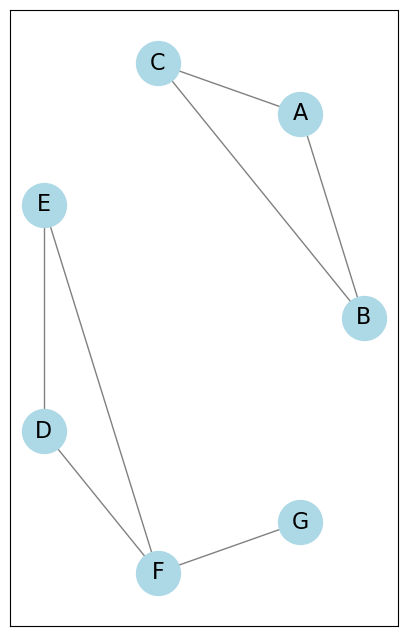

In [40]:
node_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
G = nx.Graph()
# Larger connected component (4 nodes)
G.add_weighted_edges_from([('B', 'A', 1), ('B', 'C', 1), ('C', 'A', 1)])
# Smaller connected component (3 nodes)
G.add_weighted_edges_from([('E', 'D', 1), ('E', 'F', 1), ('F', 'D', 1), ('F','G',1)])
pos = nx.circular_layout(G)
fig, ax = plt.subplots(figsize=(5, 8))
nx.draw_networkx(
    G,
    pos=pos,
    width=1,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=1000,
    font_size=16,
)

This is still one single graph. The Adjacency matrix can be obtained from networkx.
Remember, we use  pytorch to do all matrix calculation. One reason is pytorch provides all operation for matrices. The
second reason is you need to be familiar with PyTorch for your future neural network learning. 

In [41]:
row_labels = node_list
col_labels = node_list
A = nx.adjacency_matrix(G, nodelist=node_list).toarray()
A = torch.from_numpy(A)
df = pd.DataFrame(A, columns=col_labels, index=row_labels)
df

,A,B,C,D,E,F,G
A,0,1,1,0,0,0,0
B,1,0,1,0,0,0,0
C,1,1,0,0,0,0,0
D,0,0,0,0,1,1,0
E,0,0,0,1,0,1,0
F,0,0,0,1,1,0,1
G,0,0,0,0,0,1,0


We have discussed the first key feature of adjacency matrix, i.e., the node degree. Because this is an indirect graph,
either summarize the rows or the column can get the node degree. 

In [42]:
node_degree = A.sum(0)
df = pd.DataFrame(node_degree,  index=row_labels)
df

,0
A,2
B,2
C,2
D,2
E,2
F,3
G,1


A key feature of the adjacency matrix is that the multiplication of itself naturally relates to the notion of walks in a
network. For example, if we multiply by matrix A two times, the new matrix represents the number of paths whose length is
2. 

In [43]:
A_2 = torch.matmul(A, A)
df = pd.DataFrame(A_2, columns=col_labels, index=row_labels)
df


,A,B,C,D,E,F,G
A,2,1,1,0,0,0,0
B,1,2,1,0,0,0,0
C,1,1,2,0,0,0,0
D,0,0,0,2,1,1,1
E,0,0,0,1,2,1,1
F,0,0,0,1,1,3,0
G,0,0,0,1,1,0,1


The above matrix indicates for node 1 to node 1, there are two paths whose length is exactly 2. Similarly, only 1 path
whose length is 2 between node 1 and 2, i.e., (1, 3, 2)

You can try A^3, A^4, and A^5

In [44]:
A_3 = A@A@A

df = pd.DataFrame(A_3, columns=col_labels, index=row_labels)
df


,A,B,C,D,E,F,G
A,2,3,3,0,0,0,0
B,3,2,3,0,0,0,0
C,3,3,2,0,0,0,0
D,0,0,0,2,3,4,1
E,0,0,0,3,2,4,1
F,0,0,0,4,4,2,3
G,0,0,0,1,1,3,0


Now if we change the graph into a connected graph by adding the edge between node 6 and node 3

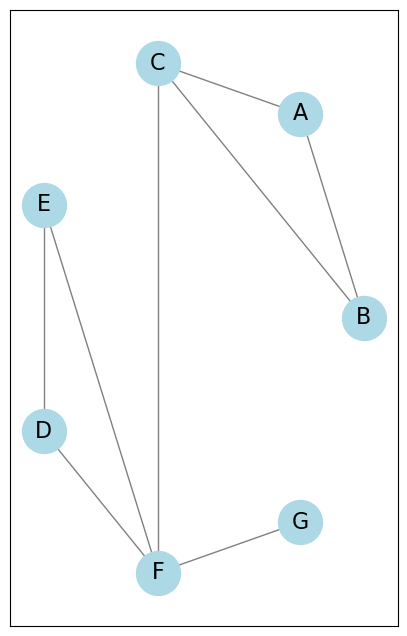

In [45]:
G.add_weighted_edges_from([('C', 'F', 1)])
fig, ax = plt.subplots(figsize=(5, 8))
nx.draw_networkx(
    G,
    pos=pos,
    width=1,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=1000,
    font_size=16,
)

The new adjacency matrix is 

In [46]:
A = nx.adjacency_matrix(G, nodelist=node_list).toarray()
df = pd.DataFrame(A, columns=col_labels, index=row_labels)
df

,A,B,C,D,E,F,G
A,0,1,1,0,0,0,0
B,1,0,1,0,0,0,0
C,1,1,0,0,0,1,0
D,0,0,0,0,1,1,0
E,0,0,0,1,0,1,0
F,0,0,1,1,1,0,1
G,0,0,0,0,0,1,0


What can you see if we calculate A^3? We can see a “fuzzy” block structure. 

We observe blocks of larger values
which correspond to the subsets of nodes {A,B,C}and {D,E,F,G}respectively. The reason for this is that
there are many walks of length three between node pairs within {A,B,C}and {D,E,F,G}.

In [47]:
matrix  = A@A@A
df = pd.DataFrame(matrix, columns=col_labels, index=row_labels)
df

,A,B,C,D,E,F,G
A,2,3,4,1,1,1,1
B,3,2,4,1,1,1,1
C,4,4,2,1,1,6,0
D,1,1,1,2,3,5,1
E,1,1,1,3,2,5,1
F,1,1,6,5,5,2,4
G,1,1,0,1,1,4,0
